In [3]:
%matplotlib qt 
#%matplotlib inline

In [4]:
# import matplotlib
# #matplotlib.use('Qt4Agg')
# matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [5]:
#%matplotlib qt
#import hyperspy.api as hs
import numpy as np
import os
import h5py
import sys

In [6]:
sys.path.append('/dls/science/groups/e02/Mohsen/code/Git_Repos/My_Repository/ptyREX_sim_matrix/')

In [7]:
from sim_utils import *

In [6]:
# Reading the data

In [7]:
sim_root_path = '/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/sim_matrix_ptyREX_v2/'
sim_paths = []
sim_names = []
for dirname, dirnames, filenames in os.walk(sim_root_path):
    for filename in filenames:
        if filename.endswith('.h5'):
            sim_paths.append(os.path.join(dirname, filename))
            sim_names.append(filename)

In [8]:
# checking diffreent convergence semi-angles

In [9]:
for i, file in enumerate(sim_names):
    print('[',i,']', file)

[ 0 ] Graphene_defect_25.0mrad_181.50A_def_4.36A_step_size.h5
[ 1 ] Graphene_defect_10.0mrad_0.00A_def_9.59A_step_size.h5
[ 2 ] Graphene_defect_32.0mrad_0.00A_def_2.92A_step_size.h5
[ 3 ] Graphene_defect_10.0mrad_0.00A_def_7.83A_step_size.h5
[ 4 ] Graphene_defect_32.0mrad_0.00A_def_0.90A_step_size.h5
[ 5 ] Graphene_defect_8.0mrad_281.70A_def_6.53A_step_size.h5
[ 6 ] Graphene_defect_10.0mrad_0.00A_def_2.40A_step_size.h5
[ 7 ] Graphene_defect_8.0mrad_0.00A_def_10.98A_step_size.h5
[ 8 ] Graphene_defect_10.0mrad_0.00A_def_5.19A_step_size.h5
[ 9 ] Graphene_defect_32.0mrad_0.00A_def_1.79A_step_size.h5
[ 10 ] Graphene_defect_15.0mrad_0.00A_def_7.89A_step_size.h5
[ 11 ] Graphene_defect_25.0mrad_181.50A_def_26.13A_step_size.h5
[ 12 ] Graphene_defect_10.0mrad_261.50A_def_6.53A_step_size.h5
[ 13 ] Graphene_defect_32.0mrad_162.50A_def_6.53A_step_size.h5
[ 14 ] Graphene_defect_15.0mrad_0.00A_def_1.97A_step_size.h5
[ 15 ] Graphene_defect_8.0mrad_0.00A_def_8.96A_step_size.h5
[ 16 ] Graphene_defect_8.

In [10]:
inds = [7, 6, 10, 24, 17, 25]
for i in inds: 
    print(sim_names[i])

Graphene_defect_8.0mrad_0.00A_def_10.98A_step_size.h5
Graphene_defect_10.0mrad_0.00A_def_2.40A_step_size.h5
Graphene_defect_15.0mrad_0.00A_def_7.89A_step_size.h5
Graphene_defect_25.0mrad_0.00A_def_1.50A_step_size.h5
Graphene_defect_32.0mrad_0.00A_def_5.38A_step_size.h5
Graphene_defect_42.0mrad_0.00A_def_1.16A_step_size.h5


In [11]:
sum_dp = []
for i in inds:
    d = sim_to_hs(sim_paths[i])
    d_sum = d.sum()
    sum_dp.append(d_sum.data)
sum_dp = hs.signals.Signal2D(sum_dp)

Dataset shape is (3, 3, 256, 256)
Dataset shape is (11, 11, 256, 256)
Dataset shape is (4, 4, 256, 256)
Dataset shape is (18, 18, 256, 256)
Dataset shape is (5, 5, 256, 256)
Dataset shape is (23, 23, 256, 256)


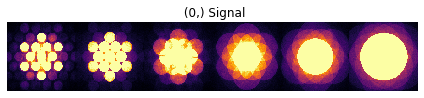

In [12]:
collage = hs.stack([image for image in sum_dp], axis=0)
collage.plot(colorbar=False, scalebar=False, axes_off = True, vmax = 700, cmap = 'inferno')

In [13]:
# defocused probe cases
def_8mrad = []
def_10mrad = []
def_15mrad = []
def_25mrad = []
def_32mrad = []
def_42mrad = []
for sim in sim_names:
    if '0.00A_def' not in sim:
        if '8.0mrad' in sim:
            def_8mrad.append(sim)
        if '10.0mrad' in sim:
            def_10mrad.append(sim)
        if '15.0mrad' in sim:
            def_15mrad.append(sim)
        if '25.0mrad' in sim:
            def_25mrad.append(sim)
        if '32.0mrad' in sim:
            def_32mrad.append(sim)
        if '42.0mrad' in sim:
            def_42mrad.append(sim)

In [14]:
def_8mrad

['Graphene_defect_8.0mrad_281.70A_def_6.53A_step_size.h5',
 'Graphene_defect_8.0mrad_281.70A_def_14.15A_step_size.h5',
 'Graphene_defect_8.0mrad_281.70A_def_21.33A_step_size.h5',
 'Graphene_defect_8.0mrad_281.70A_def_4.35A_step_size.h5',
 'Graphene_defect_8.0mrad_281.70A_def_26.12A_step_size.h5',
 'Graphene_defect_8.0mrad_281.70A_def_8.71A_step_size.h5']

In [15]:
pixelSize = 0.170e-10
conv_semi = float(def_8mrad[0].split('_')[-6][:-4])*1e-3
defocus = float(def_8mrad[0].split('_')[-5][:-1])*1e-10 # all have same def value
step_sizes = []
for sim in def_8mrad:
    step_sizes.append(float(sim.split('_')[-3][:-1])*1e-10)
step_sizes.sort()
probes = []
for step in step_sizes:
    rad, probe = calc_probe_size(pixelSize, [256,256], e_lambda(8000), defocus, conv_semi, plot_probe=False, return_probeArr=True)
    probes.append(shift_probe(abs(probe), -int(step / (2*pixelSize)), 0) + \
                    shift_probe(abs(probe), int(step / (2*pixelSize)), 0))

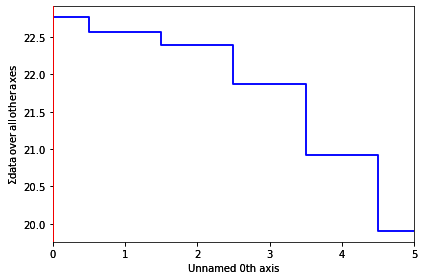

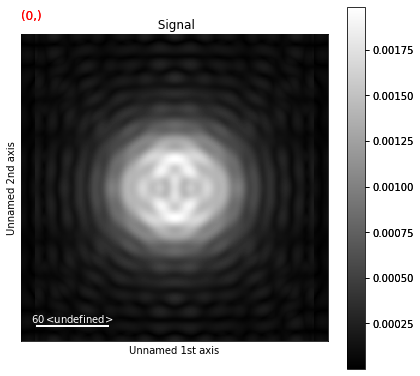

In [16]:
probes = hs.signals.Signal2D(probes)
probes.plot()

In [17]:
probes

<Signal2D, title: , dimensions: (6|256, 256)>

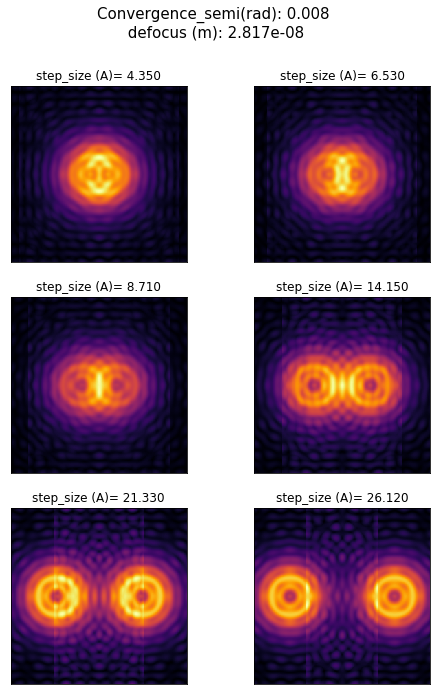

In [19]:
fig, axs = plt.subplots(3,2, figsize=(8, 11))
title = 'Convergence_semi(rad): '+ str(conv_semi)+ '\n defocus (m): '+str(defocus)
fig.suptitle(title, fontsize = 15)

for i, ax in enumerate(axs.ravel()):
    ax.imshow(probes.inav[i].data, cmap = 'inferno')
    ax.set_title('step_size (A)= %2.3f'%(1e10*step_sizes[i]))
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
#single data inspection

In [10]:
f = '/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/sim_matrix_ptyREX_v2/Graphene_defect_32.0mrad_162.50A_def_26.11A_step_size/Graphene_defect_32.0mrad_162.50A_def_26.11A_step_size.h5'

In [11]:
d = sim_to_hs(f)

Dataset shape is (2, 2, 256, 256)


In [19]:
d.sum().plot()

In [10]:
bf_ = get_bf_disc(d)


In [11]:
bf_

CircleROI(cx=128, cy=128, r=16.5, r_inner=0)

In [12]:
l = calc_camera_length(d, 16.5, 0.008, 55e-6)

In [13]:
l

0.1134375

In [17]:
7*4.35/3.4

8.955882352941176

In [18]:
256+89

345